# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = query_url + city
    response = requests.get(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s \t| %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        # How to convert this dt to human readable format:
        # https://stackoverflow.com/a/75223545
        # and what is the origin: https://openweathermap.org/current
        # and https://www.unixtimestamp.com/
        # eg: pd.to_datetime(1697130302, unit='s',origin='1970-1-1')

        # Append the City information into city_data list
        city_data.append(
            {
                "City": city, 
                "Lat": city_lat, 
                "Lng": city_lng, 
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            }
        )

    # If an error is experienced, skip the city
    except:
        print(f"City not found. Skipping...\t| {city}")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 	| blackmans bay
Processing Record 2 of Set 1 	| ribeira grande
Processing Record 3 of Set 1 	| las heras
Processing Record 4 of Set 1 	| bredasdorp
Processing Record 5 of Set 1 	| xilin hot
Processing Record 6 of Set 1 	| lebowakgomo
Processing Record 7 of Set 1 	| la passe
Processing Record 8 of Set 1 	| st. john's
Processing Record 9 of Set 1 	| santa maria del oro
Processing Record 10 of Set 1 	| bethel
Processing Record 11 of Set 1 	| medicine hat
Processing Record 12 of Set 1 	| pokhara
Processing Record 13 of Set 1 	| ploudalmezeau
Processing Record 14 of Set 1 	| devinuwara
City not found. Skipping...	| devinuwara
Processing Record 15 of Set 1 	| utrik
Processing Record 16 of Set 1 	| gumel
Processing Record 17 of Set 1 	| thompson
Processing Record 18 of Set 1 	| cliffcrest
City not found. Skipping...	| cliffcrest
Processing Record 19 of Set 1 	| rio grande
Processing Record 20 of Set 1 	|

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,9.29,86,95,0.45,AU,1697141578
1,ribeira grande,38.5167,-28.7000,20.43,77,20,4.63,PT,1697141401
2,las heras,-46.5419,-68.9359,14.98,27,3,3.19,AR,1697141579
3,bredasdorp,-34.5322,20.0403,14.38,79,95,4.69,ZA,1697141579
4,xilin hot,43.9667,116.0333,7.28,72,100,1.95,CN,1697141579


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,9.29,86,95,0.45,AU,1697141578
1,ribeira grande,38.5167,-28.7000,20.43,77,20,4.63,PT,1697141401
2,las heras,-46.5419,-68.9359,14.98,27,3,3.19,AR,1697141579
3,bredasdorp,-34.5322,20.0403,14.38,79,95,4.69,ZA,1697141579
4,xilin hot,43.9667,116.0333,7.28,72,100,1.95,CN,1697141579


### Create the Scatter Plots Requested


In [8]:
# Define function to build these scatterplots
def this_scatter(x_col, y_col, df, xlabel, ylabel, title, ax):
    
    ax.scatter(
        x=x_col,
        y=y_col,
        data=df,
        alpha=0.75,
        edgecolors='black',
        label='Data points'
    )


    # Incorporate the other graph properties
    ax.set_xlabel(xlabel, fontdict={'weight': 700})
    ax.set_ylabel(ylabel, fontdict={'weight': 700})
    # how to get today's date: https://stackoverflow.com/a/60234593
    ax.set_title(
    f"{title} ({time.strftime('%Y-%m-%d')})",
    fontdict={'weight': 700, 'size': 14}
    )

    ax.grid(True)
    ax.set_axisbelow(True)
    plt.tight_layout()
    
    



#### Latitude Vs. Temperature

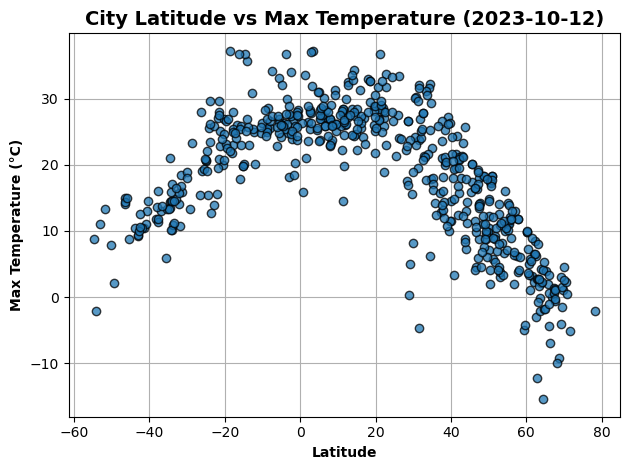

In [9]:
# Build scatter plot for latitude vs. temperature
fig, ax = plt.subplots()

this_scatter(
    x_col='Lat',
    y_col='Max Temp',
    df=city_data_df,
    xlabel='Latitude',
    ylabel='Max Temperature (°C)',
    title='City Latitude vs Max Temperature',
    ax=ax
)

# Save the figure
fig.savefig('output_data/Fig1.png')

# Show plot
plt.show()


#### Latitude Vs. Humidity

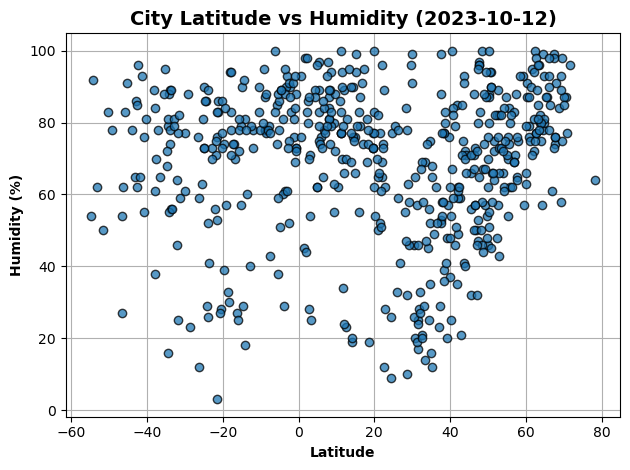

In [10]:
# Build the scatter plots for latitude vs. humidity
fig, ax = plt.subplots()

this_scatter(
    x_col='Lat',
    y_col='Humidity',
    df=city_data_df,
    xlabel='Latitude',
    ylabel='Humidity (%)',
    title='City Latitude vs Humidity',
    ax=ax
)

# Save the figure
fig.savefig('output_data/Fig2.png')

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

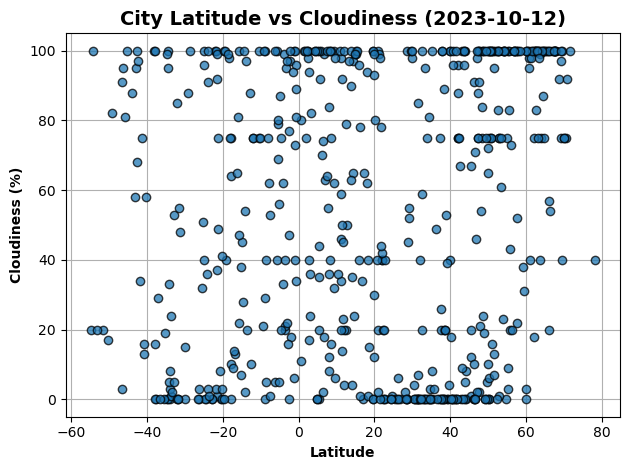

In [11]:
# Build the scatter plots for latitude vs. cloudiness
fig, ax = plt.subplots()

this_scatter(
    x_col='Lat',
    y_col='Cloudiness',
    df=city_data_df,
    xlabel='Latitude',
    ylabel='Cloudiness (%)',
    title='City Latitude vs Cloudiness',
    ax=ax
)

# Save the figure
fig.savefig('output_data/Fig3.png')

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

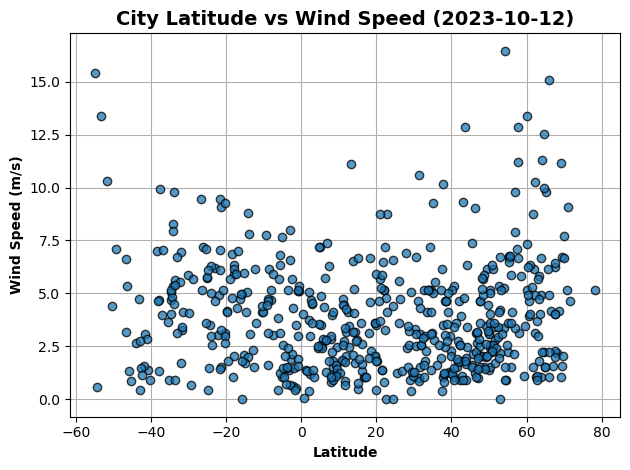

In [12]:
# Build the scatter plots for latitude vs. wind speed
fig, ax = plt.subplots()

this_scatter(
    x_col='Lat',
    y_col='Wind Speed',
    df=city_data_df,
    xlabel='Latitude',
    ylabel='Wind Speed (m/s)',
    title='City Latitude vs Wind Speed',
    ax=ax
)

# Save the figure
fig.savefig('output_data/Fig4.png')

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def this_linregress(x_col, y_col, df, xlabel, ylabel, title):

    # Define x and y values
    x_values = df[x_col]
    y_values = df[y_col]

    # Calculate the linear regression model
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


    fig, ax = plt.subplots()
    # plot points as scatterplot
    this_scatter(
        x_col=x_col,
        y_col=y_col,
        df=df,
        xlabel=xlabel,
        ylabel=ylabel,
        title=title,
        ax=ax
    )
    # Add the linear regression line
    plt.plot(
        x_values,
        regress_values,
        '-',
        color='darkred',
        label='Linear regression line'
    )

    plt.annotate(
        text=line_eq,
        xy=(.2,.3),
        xycoords='figure fraction',
        fontsize=12,
        color='darkred',
        backgroundcolor=(1, 1, 1, 0.5)
    )
    # Print r-value
    print(f"The r-value is: {rvalue}")
    print(f"The r2-value is: {rvalue**2}")
    print(f"The p-value is: {pvalue}")

    # Add a text label with the r-value
    plt.annotate(
        text=f"r-value: {rvalue:.2f}",
        xy=(.2,.25),
        xycoords='figure fraction',
        fontstyle='italic',
        fontsize=10,
        backgroundcolor=(1, 1, 1, 0.5)
    )
    
    # Add legend
    plt.legend(loc='lower left')

    plt.show()
    
    


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.copy().loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ribeira grande,38.5167,-28.7000,20.43,77,20,4.63,PT,1697141401
4,xilin hot,43.9667,116.0333,7.28,72,100,1.95,CN,1697141579
6,la passe,45.5549,-0.8967,20.13,56,67,1.61,FR,1697141579
7,st. john's,47.5649,-52.7093,13.97,97,100,4.63,CA,1697141579
8,santa maria del oro,25.9333,-105.3667,27.49,33,0,5.61,MX,1697141579


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.copy().loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,9.29,86,95,0.45,AU,1697141578
2,las heras,-46.5419,-68.9359,14.98,27,3,3.19,AR,1697141579
3,bredasdorp,-34.5322,20.0403,14.38,79,95,4.69,ZA,1697141579
5,lebowakgomo,-24.2000,29.5000,25.50,29,36,3.49,ZA,1697141579
16,rio grande,-32.0350,-52.0986,14.06,64,85,6.94,BR,1697141580


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8443667169397132
The r2-value is: 0.7129551526755498
The p-value is: 1.4609043758307674e-108


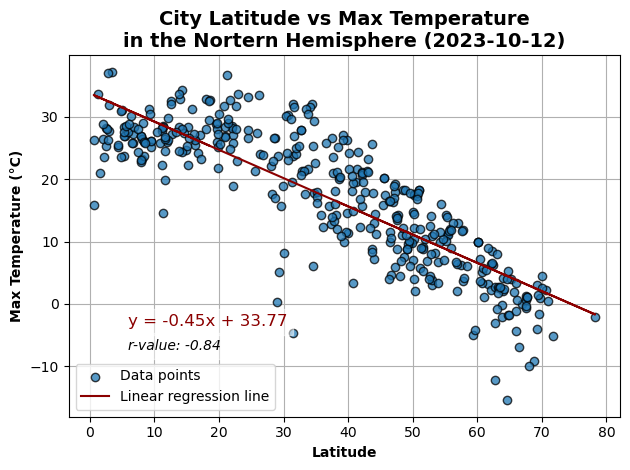

In [16]:
# Linear regression on Northern Hemisphere
this_linregress(
    x_col='Lat',
    y_col='Max Temp',
    df=northern_hemi_df,
    xlabel='Latitude',
    ylabel='Max Temperature (°C)',
    title='City Latitude vs Max Temperature\nin the Nortern Hemisphere',
)


The r-value is: 0.8059814570761558
The r2-value is: 0.6496061091506031
The p-value is: 2.4813967262774884e-40


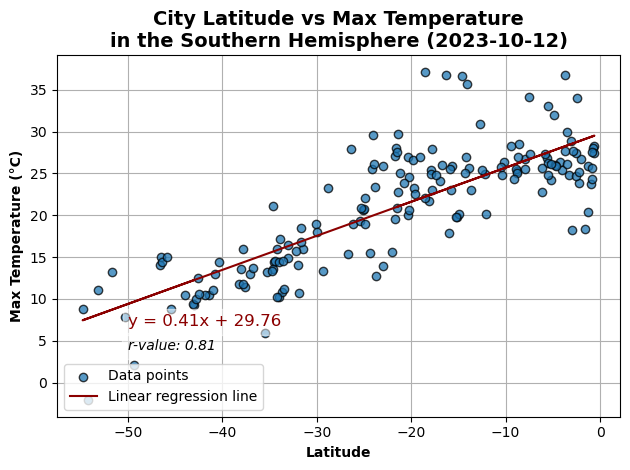

In [17]:
# Linear regression on Southern Hemisphere
this_linregress(
    x_col='Lat',
    y_col='Max Temp',
    df=southern_hemi_df,
    xlabel='Latitude',
    ylabel='Max Temperature (°C)',
    title='City Latitude vs Max Temperature\nin the Southern Hemisphere',
)


**Discussion about the linear relationship:** The correlation between city latitude and maximum temperature is strong for cities in both the northern and the southern hemispheres (r values are -0.84 and 0.81, respectively). It is negative for the northern hemisphere and positive for the southern hemisphere, meaning that as distance from the equator increases, maximum temperature decreases. We can conclude that distance from the equator (i.e. the absolute value of latitude) has a strong relationship with maximum temperature. The r2 values indicate that the linear regression lines explain most of the variation observed (over 60%).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1045857398182465
The r2-value is: 0.01093817697332995
The p-value is: 0.03773570316107432


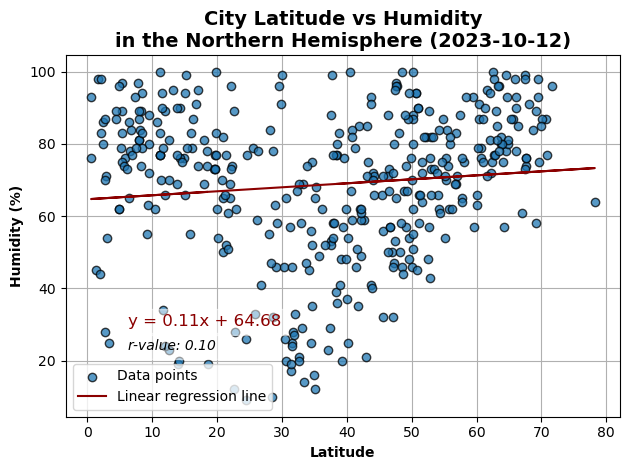

In [18]:
# Northern Hemisphere
this_linregress(
    x_col='Lat',
    y_col='Humidity',
    df=northern_hemi_df,
    xlabel='Latitude',
    ylabel='Humidity (%)',
    title='City Latitude vs Humidity\nin the Northern Hemisphere',
)


The r-value is: 0.11806016421967061
The r2-value is: 0.013938202375575593
The p-value is: 0.12407381865181914


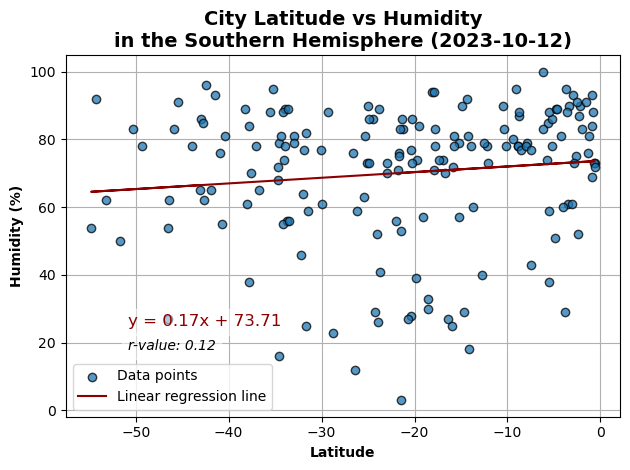

In [19]:
# Southern Hemisphere
this_linregress(
    x_col='Lat',
    y_col='Humidity',
    df=southern_hemi_df,
    xlabel='Latitude',
    ylabel='Humidity (%)',
    title='City Latitude vs Humidity\nin the Southern Hemisphere',
)


**Discussion about the linear relationship:** The correlation between city latitude and humidity is very weak for cities in both the northern and the southern hemispheres (r values are 0.10 and 0.12, respectively). Both are positive, meaning that as latitude increases, humidity increases as well, but they are so close to 0 that this is negligible and the relationship is probably due to randomness. We can conclude that latitude has a very weak relationship with humidity. The r2 values indicate that the linear regression lines explain a very small percentage of the variation observed (less than 2%).

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1969810149792695
The r2-value is: 0.038801520262263196
The p-value is: 8.107690075014501e-05


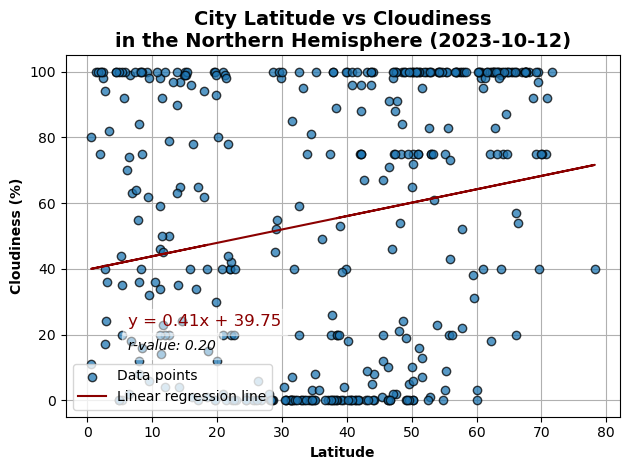

In [20]:
# Northern Hemisphere
this_linregress(
    x_col='Lat',
    y_col='Cloudiness',
    df=northern_hemi_df,
    xlabel='Latitude',
    ylabel='Cloudiness (%)',
    title='City Latitude vs Cloudiness\nin the Northern Hemisphere',
)


The r-value is: 0.11867488274598358
The r2-value is: 0.01408372779477295
The p-value is: 0.12211388477320115


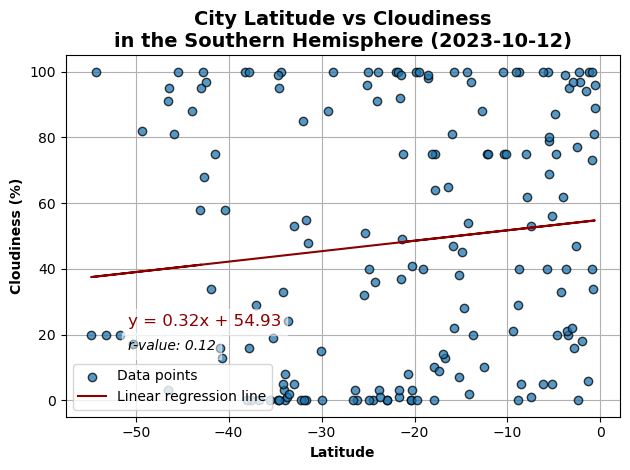

In [21]:
# Southern Hemisphere
this_linregress(
    x_col='Lat',
    y_col='Cloudiness',
    df=southern_hemi_df,
    xlabel='Latitude',
    ylabel='Cloudiness (%)',
    title='City Latitude vs Cloudiness\nin the Southern Hemisphere',
)


**Discussion about the linear relationship:** The correlation between city latitude and cloudiness is weak for cities in both the northern and the southern hemispheres (r values are 0.20 and 0.12, respectively). Both are positive, meaning that as latitude increases, cloudiness increases as well. We can conclude that latitude has a weak relationship with cloudiness that is very possibly due to randomness. The r2 values indicate that the linear regression lines explain a very small percentage of the variation observed (less than 4%).

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.23681203395970793
The r2-value is: 0.056079939428133864
The p-value is: 1.940748795092287e-06


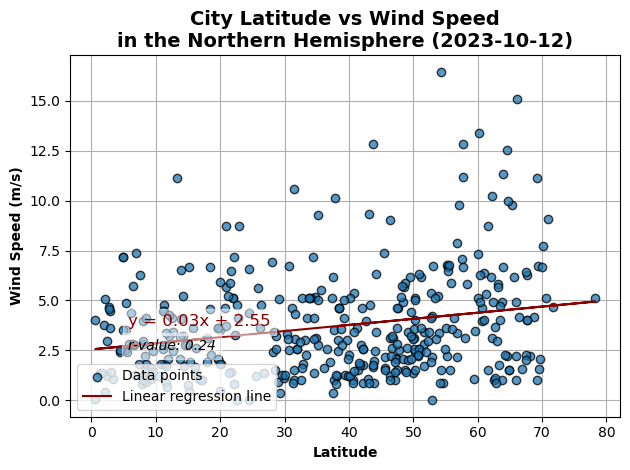

In [22]:
# Northern Hemisphere
this_linregress(
    x_col='Lat',
    y_col='Wind Speed',
    df=northern_hemi_df,
    xlabel='Latitude',
    ylabel='Wind Speed (m/s)',
    title='City Latitude vs Wind Speed\nin the Northern Hemisphere',
)


The r-value is: -0.20512124890264674
The r2-value is: 0.042074726751381554
The p-value is: 0.007117134135055157


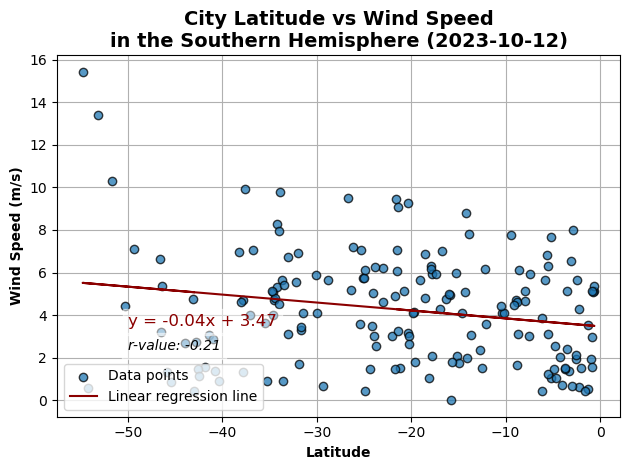

In [23]:
# Southern Hemisphere
this_linregress(
    x_col='Lat',
    y_col='Wind Speed',
    df=southern_hemi_df,
    xlabel='Latitude',
    ylabel='Wind Speed (m/s)',
    title='City Latitude vs Wind Speed\nin the Southern Hemisphere',
)


**Discussion about the linear relationship:** The correlation between city latitude and wind speed is weak, but almost moderate, for cities in both the northern and the southern hemispheres (r values are 0.24 and -0.21, respectively). It is positive for the northern hemisphere and negative for the southern hemisphere, meaning that as distance from the equator increases, wind speed increases as well. We can conclude that distance from the equator (i.e. the absolute value of latitude) has a weak relationship with wind speed that might be due to randomness. The r2 values indicate that the linear regression lines explain a very small percentage of the variation observed (less than 6%).